In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\rshib\Desktop\Krato\Linear Reg\carprices.txt")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
le = LabelEncoder()
le

LabelEncoder()

In [4]:
df["Car Model"] = le.fit_transform(df["Car Model"])
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [5]:
X = df.drop(columns = "Sell Price($)")
X

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [6]:
z = X[["Car Model", "Mileage", "Age(yrs)"]]
z

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [7]:
y = df["Sell Price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [8]:
model = LinearRegression()
model.fit(X[["Car Model", "Mileage", "Age(yrs)"]],y)

LinearRegression()

In [9]:
model.score(X[["Car Model", "Mileage", "Age(yrs)"]],y)

0.8719970367825953

In [10]:
cross_val_score(LinearRegression(),X,y,cv=2)

array([ 0.57135126, -1.35563682])

In [11]:
df = pd.read_csv(r"C:\Users\rshib\Desktop\Krato\Linear Reg\carprices.txt")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [12]:
df1 = pd.get_dummies(df)
df1.drop(columns="Car Model_Mercedez Benz C class", inplace=True)
df1

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [13]:
X = df1.drop(columns="Sell Price($)")
y = df1["Sell Price($)"]

In [14]:
model.fit(X,y)
model.score(X,y)

0.9417050937281083

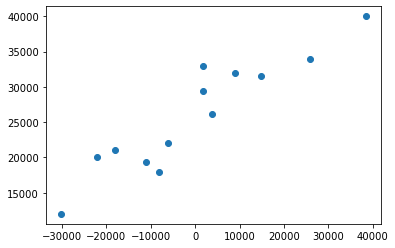

In [15]:
d_reducer = PCA(n_components=1)
pca_data = d_reducer.fit_transform(X)
plt.scatter(pca_data, y)

In [16]:
model.fit(pca_data,y)
model.score(pca_data,y)

0.8595436654028509